Buffer Pool Size: 100, Page Count: 36049, Read Count: 1172060, Write Count: 1202245
Buffer Pool Size: 500, Page Count: 36169, Read Count: 833068, Write Count: 867815
Buffer Pool Size: 1000, Page Count: 36104, Read Count: 696830, Write Count: 731376
Buffer Pool Size: 2000, Page Count: 36052, Read Count: 544539, Write Count: 578280
Buffer Pool Size: 5000, Page Count: 36132, Read Count: 337121, Write Count: 368192
Buffer Pool Size: 10000, Page Count: 36122, Read Count: 197523, Write Count: 223645
Buffer Pool Size: 20000, Page Count: 36160, Read Count: 63000, Write Count: 79160
Buffer Pool Size: 30000, Page Count: 36148, Read Count: 9737, Write Count: 15894
Buffer Pool Size: 40000, Page Count: 36086, Read Count: 241, Write Count: 633
Buffer Pool Size: 50000, Page Count: 36061, Read Count: 4, Write Count: 8


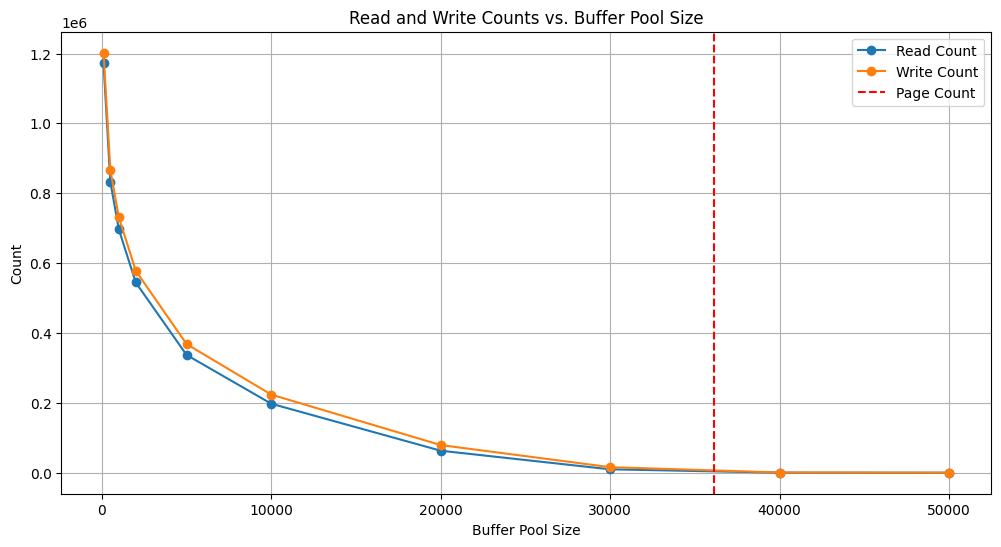

In [2]:
# Import necessary libraries
import subprocess
import re
import matplotlib.pyplot as plt
import csv
import os

# Define a function to run the binary and extract the I/O counts
def run_binary(buffer_pool_size):
    command = f'../target/release/fbt_on_disk -u -b {buffer_pool_size}'
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    if stderr:
        print(f"Error: {stderr.decode()}")
        return None, None
    
    stdout = stdout.decode()
    read_count = None
    write_count = None
    page_count = None
    
    for line in stdout.split('\n'):
        if 'New Page' in line:
            page_count = int(re.search(r'\d+', line).group())
        if 'Read Count' in line:
            read_count = int(re.search(r'\d+', line).group())
        if 'Write Count' in line:
            write_count = int(re.search(r'\d+', line).group())
            break
    
    return page_count, read_count, write_count

# Define buffer pool sizes to test
buffer_pool_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

# CSV file to store results
csv_file = 'fbt_io_insert_counts.csv'

# Check if the file exists
if os.path.exists(csv_file):
    # Read data from the file
    results = []
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            buffer_pool_size, page_count, read_count, write_count = map(int, row)
            results.append([buffer_pool_size, page_count, read_count, write_count])
else:
    # Initialize lists to store the results
    results = []

    # Run the binary for each buffer pool size and store the results
    for size in buffer_pool_sizes:
        page_count, read_count, write_count = run_binary(size)
        results.append([size, page_count, read_count, write_count])
        print(f"Buffer Pool Size: {size}, Page Created: {page_count}, Read Count: {read_count}, Write Count: {write_count}")

    # Write the results to a CSV file
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Buffer Pool Size', 'Page Created', 'Read Count', 'Write Count'])
        writer.writerows(results)

# Extract data for plotting
buffer_pool_sizes = [result[0] for result in results]
page_counts = [result[1] for result in results]
read_counts = [result[2] for result in results]
write_counts = [result[3] for result in results]

# Print the average Page Created as a strait line 
# parallel to the y-axis
page_count_avg = sum(page_counts) / len(page_counts)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(buffer_pool_sizes, read_counts, label='Read Count', marker='o')
plt.plot(buffer_pool_sizes, write_counts, label='Write Count', marker='o')
plt.axvline(x=page_count_avg, color='r', linestyle='--', label='Page Created')
plt.xlabel('Buffer Pool Size')
plt.ylabel('Count')
plt.title('Read and Write Counts vs. Buffer Pool Size')
plt.legend()
plt.grid(True)
plt.show()


Buffer Pool Size: 100, Page Count: 76, Read Count: 1361402, Write Count: 854362
Buffer Pool Size: 500, Page Count: 84, Read Count: 1021910, Write Count: 524208
Buffer Pool Size: 1000, Page Count: 75, Read Count: 888152, Write Count: 394650
Buffer Pool Size: 2000, Page Count: 74, Read Count: 764077, Write Count: 278740
Buffer Pool Size: 5000, Page Count: 84, Read Count: 536650, Write Count: 84375
Buffer Pool Size: 10000, Page Count: 66, Read Count: 393233, Write Count: 8652
Buffer Pool Size: 20000, Page Count: 73, Read Count: 241274, Write Count: 1513
Buffer Pool Size: 30000, Page Count: 95, Read Count: 94560, Write Count: 1461
Buffer Pool Size: 40000, Page Count: 92, Read Count: 553, Write Count: 2
Buffer Pool Size: 50000, Page Count: 77, Read Count: 5, Write Count: 0


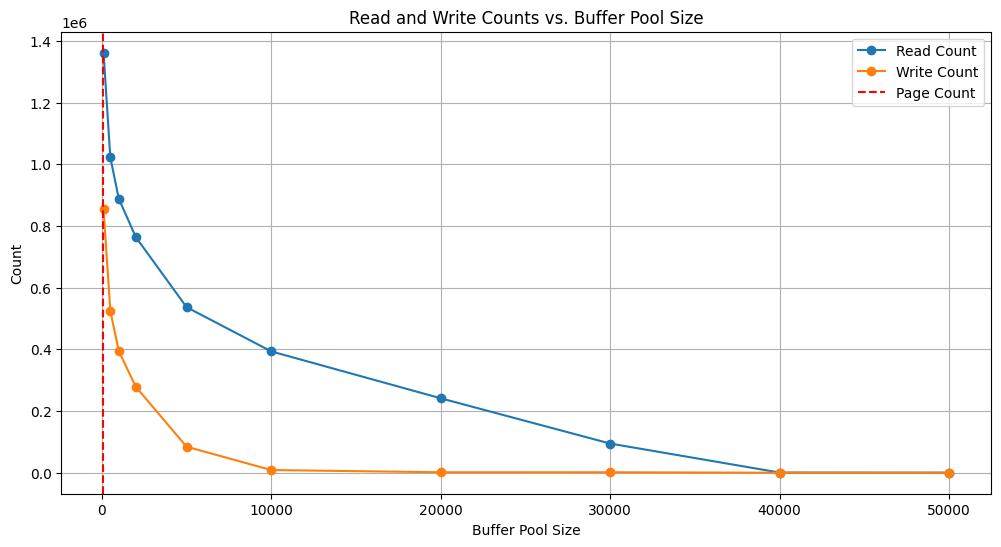

In [3]:
# Import necessary libraries
import subprocess
import re
import matplotlib.pyplot as plt
import csv
import os

# Define a function to run the binary and extract the I/O counts
def run_binary(buffer_pool_size):
    command = f'../target/release/fbt_on_disk_get -u -b {buffer_pool_size}'
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    if stderr:
        print(f"Error: {stderr.decode()}")
        return None, None
    
    stdout = stdout.decode()
    read_count = None
    write_count = None
    page_count = None
    
    flag = False

    for line in stdout.split('\n'):
        if 'After Get' in line:
            flag = True
        if flag and 'New Page' in line:
            page_count = int(re.search(r'\d+', line).group())
        if flag and 'Read Count' in line:
            read_count = int(re.search(r'\d+', line).group())
        if flag and 'Write Count' in line:
            write_count = int(re.search(r'\d+', line).group())
            break
    
    return page_count, read_count, write_count

# Define buffer pool sizes to test
buffer_pool_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

# CSV file to store results
csv_file = 'fbt_io_get_counts.csv'

# Check if the file exists
if os.path.exists(csv_file):
    # Read data from the file
    results = []
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            buffer_pool_size, page_count, read_count, write_count = map(int, row)
            results.append([buffer_pool_size, page_count, read_count, write_count])
else:
    # Initialize lists to store the results
    results = []

    # Run the binary for each buffer pool size and store the results
    for size in buffer_pool_sizes:
        page_count, read_count, write_count = run_binary(size)
        results.append([size, page_count, read_count, write_count])
        print(f"Buffer Pool Size: {size}, Page Created: {page_count}, Read Count: {read_count}, Write Count: {write_count}")

    # Write the results to a CSV file
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Buffer Pool Size', 'Read Count', 'Write Count'])
        writer.writerows(results)

# Extract data for plotting
buffer_pool_sizes = [result[0] for result in results]
page_counts = [result[1] for result in results]
read_counts = [result[2] for result in results]
write_counts = [result[3] for result in results]

page_count_avg = sum(page_counts) / len(page_counts)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(buffer_pool_sizes, read_counts, label='Read Count', marker='o')
plt.plot(buffer_pool_sizes, write_counts, label='Write Count', marker='o')
plt.axvline(x=page_count_avg, color='r', linestyle='--', label='Page Created')
plt.xlabel('Buffer Pool Size')
plt.ylabel('Count')
plt.title('Read and Write Counts vs. Buffer Pool Size')
plt.legend()
plt.grid(True)
plt.show()